In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

In [37]:
df_train = read_csv('emotions_train.csv')

In [43]:
df_train.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [44]:
df_train.shape

(21459, 2)

In [117]:
df_train.shape[0]

21459

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [46]:
# Recherche de valeurs manquantes
df_train.isna().sum()

Text       0
Emotion    0
dtype: int64

In [74]:
duplicata = df_train.Text.duplicated() 

- Il y a des données dupliquées. Faut-il les supprimer ou pas, on verra ??

In [122]:
len(df_train[duplicata])

54

In [ ]:
Il y a peu de données dupliquées soit 0.02% , donc nous allons les supprimer.

In [126]:
#df_train.Text.unique().size

- 21459 expressions dont 21405 uniques

In [ ]:
df_train.drop

In [127]:
df_train_unique = df.drop_duplicates(subset='Text')

In [128]:
df_train_unique.shape

(21405, 2)

In [134]:
# Nombre de caractère prèsent dans chaque phrase
nb_caracteres = df_train_unique['Text'].str.len()
nb_caracteres

0         23
1        108
2         48
3         92
4         20
        ... 
21454     36
21455     91
21456     36
21457     50
21458     31
Name: Text, Length: 21405, dtype: int64

<Axes: >

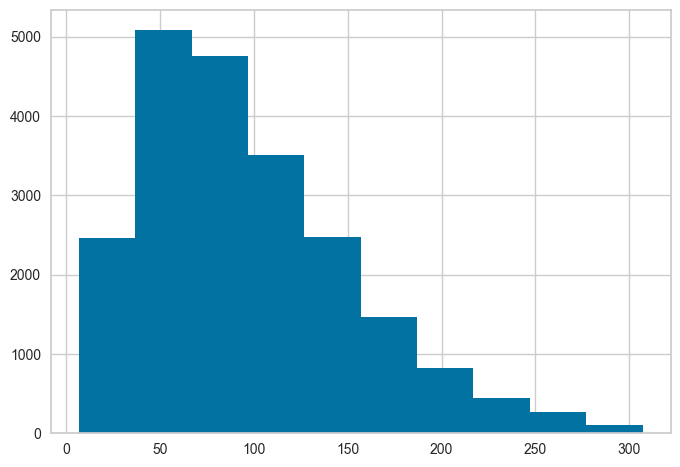

In [155]:
nb_caracteres .hist()

- Le nombre de caractère s'étends entre 20 et 300 caractères et générallement c'est entre 50 à 80 caractères.

In [137]:
# Recherche du nombre de mots présents dans les phrases
nb_de_mots = df['Text'].str.split().map(lambda x: len(x))
nb_de_mots

0         4
1        21
2        10
3        18
4         4
         ..
21454     7
21455    13
21456     6
21457     8
21458     7
Name: Text, Length: 21459, dtype: int64

<Axes: >

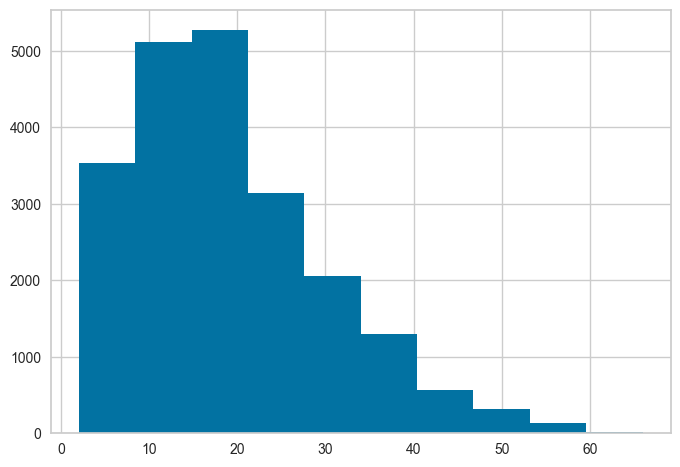

In [136]:
nb_de_mots.hist()

- Le nombre de mots présents dans les phrases est compris entre 4 et 60 mots, et le plus frèquent, c'est entre 15 à 20 mots.

In [138]:
# Moyenne des longueurs des mots
moyenne_longueur_mots = df['Text'].str.split().apply(lambda x : [len(i) for i in x]). map(lambda x: np.mean(x))
moyenne_longueur_mots

0        5.000000
1        4.190476
2        3.900000
3        4.166667
4        4.250000
           ...   
21454    4.285714
21455    6.076923
21456    5.166667
21457    5.375000
21458    3.571429
Name: Text, Length: 21459, dtype: float64

<Axes: >

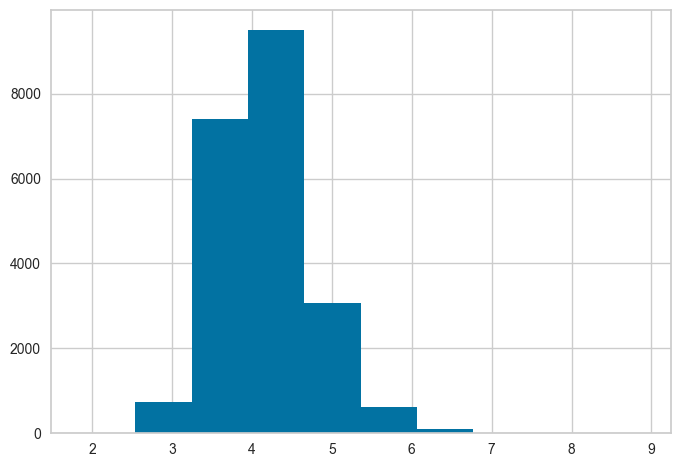

In [139]:
moyenne_longueur_mots.hist()

- En moyenne, 3 à 7 mots sont utilisés, plus frèquemment 5 mots. Ceci nous rensegnerait-il que les gens utilisent de mots courts pour exprimer leurs émotions??

In [140]:
#! pip install Wordcloud

In [141]:
from wordcloud import WordCloud

In [143]:
text = " ".join(df_train_unique['Text'])

In [144]:
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size = 10).generate(text)


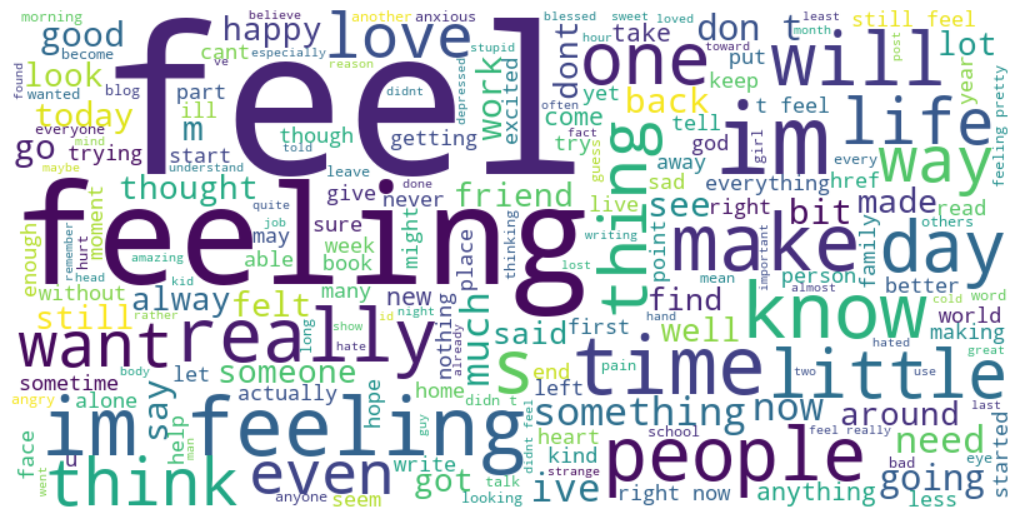

In [145]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

In [149]:
df_train_unique.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [150]:
import plotly.graph_objects as go

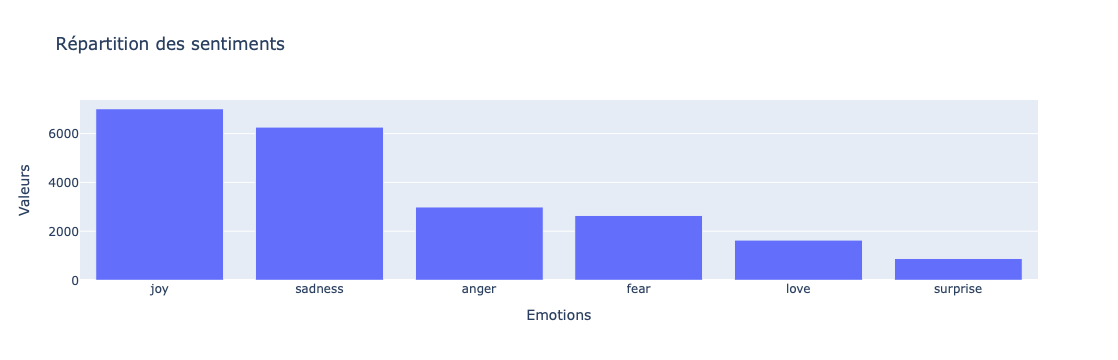

In [153]:
# Répartition du target

fig = go.Figure([go.Bar(x=df_train_unique['Emotion'].value_counts().index, y=df_train_unique['Emotion'].value_counts().tolist())])
fig.update_layout(
    title="Répartition des sentiments",
    xaxis_title="Emotions",
    yaxis_title="Valeurs")
fig.show()

In [156]:
# NLTK

In [158]:
import nltk

In [159]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amina.sadio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [191]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amina.sadio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amina.sadio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [165]:
df_train_unique.Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21405, dtype: object

In [193]:
df = df_train_unique.copy()

In [194]:
def text_processing(text):
     #Charger les stop-words en anglais
    stop_words = set(stopwords.words('english'))
   

    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Appliquer la tokenisation à tous les textes
    tokens = word_tokenize(text.lower())

    # Supprimer les ponctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    

    # Supprimer les stop-words
    tokens = [word for word in tokens if word not in stop_words]
    

    # Appliquer la lemmatisation à tous les tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens
    

In [195]:
df['Text_process'] = df['Text'].apply(text_processing)

In [196]:
df1.head()

,Text,Emotion,Text_process
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,"[feeling, grouchy]"


In [ ]:
from pycaret.classification import *

In [18]:
df_test = pd.read_csv("emotions_test.csv")

In [19]:
df_test.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [20]:
df_test.drop(columns =['tweet_id', 'author'], axis = 1, inplace = True)  

In [21]:
#df_test.rename(columns={ 'sentiment' : 'Emotion' , 'content' : 'Text'})


In [22]:
df_test.columns = df_test.columns.str.replace('sentiment', 'Emotion')
df_test.columns = df_test.columns.str.replace('content', 'Text')

In [23]:
df_test.columns

Index(['Emotion', 'Text'], dtype='object')

In [24]:
df_emotions = pd.concat([df, df_test])

In [25]:
df_emotions.shape

(61459, 2)

In [33]:
df_emotions.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [31]:
#from pycaret.classification import *

In [27]:
#! pip install pycaret

In [32]:
#from pycaret.classification import *
#s = setup(df_emotions, target = 'Emotion', session_id = 123, index= False, text_feature = ['Text'])


In [ ]:
#conda install lightgbm

In [35]:
df_emotions["Emotion"].value_counts()

Emotion
joy           12238
sadness       11430
neutral        8638
worry          8459
love           5483
anger          3103
surprise       3066
fear           2652
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: count, dtype: int64